In [2]:
import seaborn as sns 
sns.set()

import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

import warnings 
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams['font.family'] = ['Comic Sans MS', 'sans-serif']

colors = ['#fe7c73', '#2471A3']

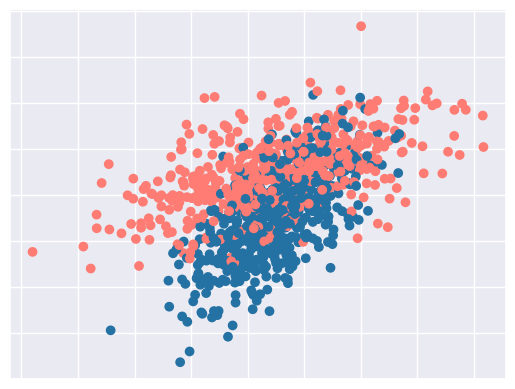

In [4]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_clusters_per_class=1,
    n_informative=2, class_sep=0.5,
    n_redundant=0,
    n_repeated=0
)

fig, ax = plt.subplots()
plt.scatter(X[:,0], X[:,1], c=[colors[i] for i in y])
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

In [5]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2)

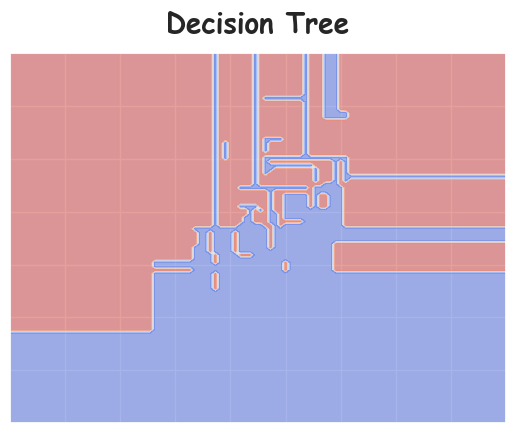

In [9]:
dtree = DecisionTreeClassifier()
dtree.fit(X, y)

xx, yy = np.meshgrid(np.linspace(np.floor(X[:,0].min()), np.ceil(X[:,0].max()), 100), np.linspace(np.floor(X[:, 1].min()), np.ceil(X[:, 1].max()), 100))
Z = dtree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm_r')
ax.set_title("Decision Tree", fontsize = 20, fontweight = "bold", pad=15)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

In [10]:
dtree.score(X_test, y_test)

0.665

[Text(0, -4.0, ''),
 Text(0, -3.0, ''),
 Text(0, -2.0, ''),
 Text(0, -1.0, ''),
 Text(0, 0.0, ''),
 Text(0, 1.0, ''),
 Text(0, 2.0, ''),
 Text(0, 3.0, '')]

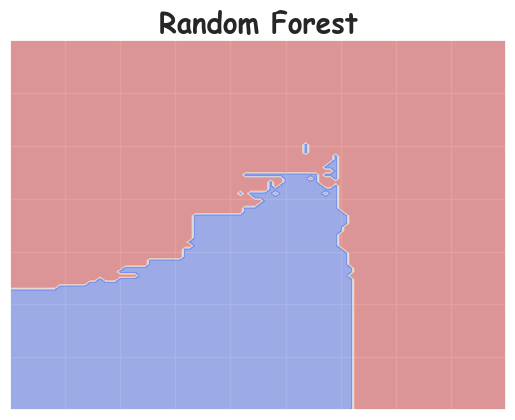

In [12]:
rfmodel = RandomForestClassifier(n_estimators=100, max_features=0.3, ccp_alpha=0.003)
rfmodel.fit(X, y)

xx, yy = np.meshgrid(np.linspace(np.floor(X[:, 0].min()), np.ceil(X[:, 0].max()), 100), np.linspace(np.floor(X[:, 1].min()), np.ceil(X[:, 1].max()), 100))
Z = rfmodel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm_r')
ax.set_title("Random Forest", fontsize=20, fontweight="bold")
ax.set_xticklabels([])
ax.set_yticklabels([])

In [13]:
rfmodel.score(X, y), rfmodel.score(X_test, y_test)

(0.85125, 0.71)

In [16]:
y1 = rfmodel.predict(X)

[Text(0, -4.0, ''),
 Text(0, -3.0, ''),
 Text(0, -2.0, ''),
 Text(0, -1.0, ''),
 Text(0, 0.0, ''),
 Text(0, 1.0, ''),
 Text(0, 2.0, ''),
 Text(0, 3.0, '')]

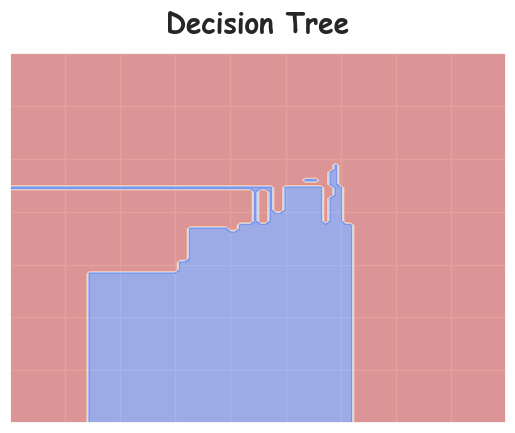

In [20]:
dtree = DecisionTreeClassifier() 
dtree.fit(X, y1)

xx, yy = np.meshgrid(np.linspace(np.floor(X[:, 0].min()), np.ceil(X[:, 0]).max(), 100), np.linspace(np.floor(X[:, 1].min()), np.ceil(X[:, 1].max()), 100))
Z = dtree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots() 
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm_r')
ax.set_title("Decision Tree", fontsize=20, fontweight="bold", pad=15)
ax.set_xticklabels([])
ax.set_yticklabels([])


In [21]:
y1 = rfmodel.predict(X)

In [23]:
%%timeit
dtree.predict(X)

135 µs ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [24]:
%%timeit 
rfmodel.predict(X)

11.1 ms ± 3.72 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
dtree.score(X_test, y_test)

0.735

In [26]:
rfmodel.score(X_test, y_test)

0.71